# K-Nearest Neighbors

## Introduction
K-Nearest Neighbors is a classification algorithm.  
The data is classified by the majority of the K nearest neighbors.  

## Algorithm
1. Choose the number of K neighbors.
2. Calculate the distance of K neighbors.
3. Take the majority of the K neighbors as the classification.

## Hyperparameters
1. K: Number of neighbors.  
K should be an odd number to avoid ties.  
K should be small enough to avoid overfitting but large enough to avoid underfitting and noise.  
K are usually chosen by cross-validation.  
2. Distance Metric: Euclidean, Manhattan, Minkowski.  

## Distance
1. Euclidean Distance:
$$d_{(x, y)} = \sqrt{\sum_{i=1}^{n}(x_i - y_i)^2}$$
2. Manhattan Distance:
$$d_{(x, y)} = \sum_{i=1}^{n}|x_i - y_i|$$
3. Minkowski Distance:
$$d_{(x, y)} = (\sum_{i=1}^{n}|x_i - y_i|^p)^{1/p}$$

## Implementation

In [40]:
import numpy as np

class KNearestNeighbors:
    def __init__(self,k=3)->None:
        self.k = k
        self.X_train = None
        self.y_train = None
        
    def fit(self, X_train:np.ndarray, y_train:np.ndarray)->None:
        self.X_train = X_train
        self.y_train = y_train
        
    def predict(self, X_test:np.ndarray)->np.ndarray:
        # Euclidean Distance between X_train and X_test
        dist=((X_test.reshape(-1,1,2) - self.X_train.reshape(1,-1,2))**2).sum(axis=2)**0.5
        # nearest k neighbors(indices)
        k_indices = np.argsort(dist,axis=1)[:, :self.k]
        # nearest labels
        k_nearest_labels=self.y_train[k_indices]
        # prediction of y using majority vote
        y_pred = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=1, arr=k_nearest_labels)
        
        return y_pred
    
    def score(self, X_test:np.ndarray, y_test:np.ndarray)->float:
        y_pred = self.predict(X_test)
        return np.mean(y_pred == y_test)

### Iris Dataset Classification

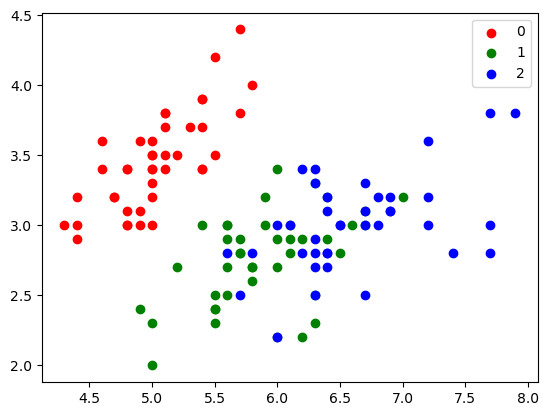

In [50]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='r', label='0')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='g', label='1')
plt.scatter(X_train[y_train == 2][:, 0], X_train[y_train == 2][:, 1], color='b', label='2')
plt.legend()
plt.show()

#### K=3

In [51]:
knn = KNearestNeighbors(k=3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.7

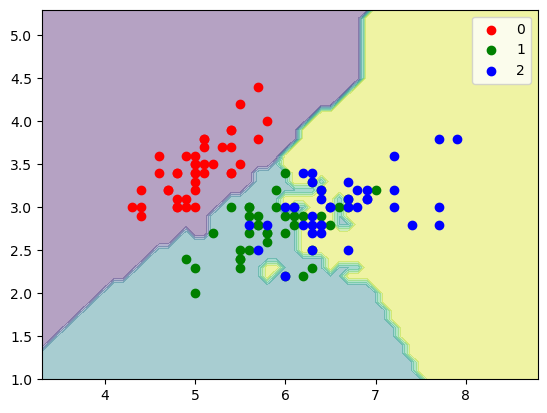

In [52]:
# Plot the decision boundary
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='r', label='0')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='g', label='1')
plt.scatter(X_train[y_train == 2][:, 0], X_train[y_train == 2][:, 1], color='b', label='2')
plt.legend()
plt.show()

#### different k values

[7]


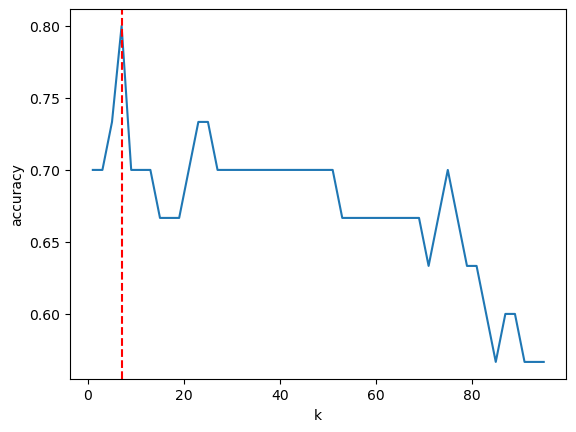

In [53]:
# score for different k values
k_values = [2*k+1 for k in range(48)]

scores = []
for k in k_values:
    knn = KNearestNeighbors(k=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
 
# Find the best k value
best_k = [k_values[i] for i in range(len(scores)) if scores[i] == max(scores)]
print(best_k)

# Plot the accuracy for different k values and find the best k value
plt.plot(k_values, scores)
for i in range(len(best_k)):
    plt.axvline(x=best_k[i], color='r', linestyle='--')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()



#### best k value

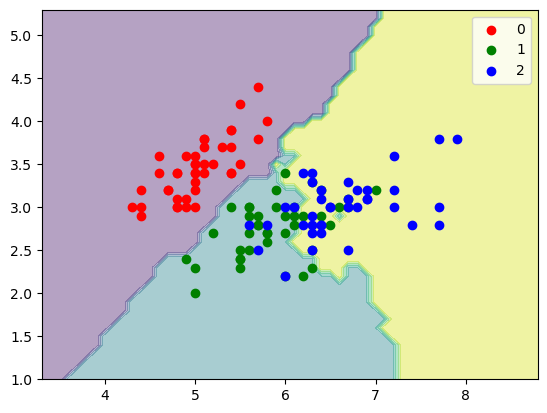

In [54]:
# K=7
knn = KNearestNeighbors(k=7)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

# Plot the decision boundary
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='r', label='0')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='g', label='1')
plt.scatter(X_train[y_train == 2][:, 0], X_train[y_train == 2][:, 1], color='b', label='2')
plt.legend()
plt.show()